In [2]:
###https://www.cnblogs.com/xxhbdk/p/9192750.html

seed: 4.0751225994836595
solution: -4.551148163965435


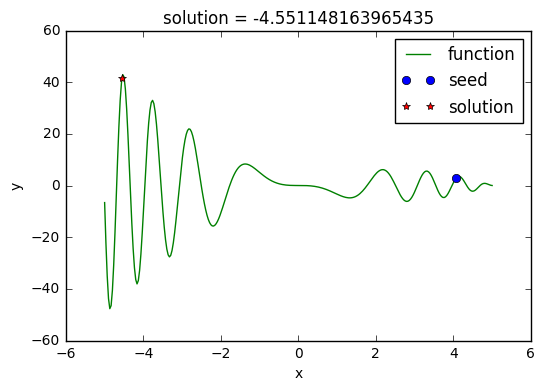

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

class SA(object):

    def __init__(self, interval, tab='min', T_max=10000, T_min=1, iterMax=1000, rate=0.95):
        self.interval = interval                                    # 给定状态空间 - 即待求解空间
        self.T_max = T_max                                          # 初始退火温度 - 温度上限
        self.T_min = T_min                                          # 截止退火温度 - 温度下限
        self.iterMax = iterMax                                      # 定温内部迭代次数
        self.rate = rate                                            # 退火降温速度
        #############################################################
        self.x_seed = random.uniform(interval[0], interval[1])      # 解空间内的种子
        self.tab = tab.strip()                                      # 求解最大值还是最小值的标签: 'min' - 最小值；'max' - 最大值
        #############################################################
        self.solve()                                                # 完成主体的求解过程
        self.display()                                              # 数据可视化展示
        
    def solve(self):
        temp = 'deal_' + self.tab                                   # 采用反射方法提取对应的函数
        if hasattr(self, temp):
            deal = getattr(self, temp)
        else:
            exit('>>>tab标签传参有误："min"|"max"<<<')  
        x1 = self.x_seed
        T = self.T_max
        while T >= self.T_min:
            for i in range(self.iterMax):
                f1 = self.func(x1)
                delta_x = random.random() * 2 - 1
                if x1 + delta_x >= self.interval[0] and x1 + delta_x <= self.interval[1]:   # 将随机解束缚在给定状态空间内
                    x2 = x1 + delta_x
                else:
                    x2 = x1 - delta_x
                f2 = self.func(x2)
                delta_f = f2 - f1
                x1 = deal(x1, x2, delta_f, T)
            T *= self.rate
        self.x_solu = x1                                            # 提取最终退火解       
        
    def func(self, x):                                              # 状态产生函数 - 即待求解函数
        value = np.sin(x**2) * (x**2 - 5*x)
        return value
        
    def p_min(self, delta, T):                                      # 计算最小值时，容忍解的状态迁移概率
        probability = np.exp(-delta/T)
        return probability
        
    def p_max(self, delta, T):
        probability = np.exp(delta/T)                               # 计算最大值时，容忍解的状态迁移概率
        return probability
        
    def deal_min(self, x1, x2, delta, T):
        if delta < 0:                                               # 更优解
            return x2
        else:                                                       # 容忍解
            P = self.p_min(delta, T)
            if P > random.random(): return x2
            else: return x1
            
    def deal_max(self, x1, x2, delta, T):
        if delta > 0:                                               # 更优解
            return x2
        else:                                                       # 容忍解
            P = self.p_max(delta, T)
            if P > random.random(): return x2
            else: return x1
        
    def display(self):
        print('seed: {}\nsolution: {}'.format(self.x_seed, self.x_solu))
        plt.figure(figsize=(6, 4))
        x = np.linspace(self.interval[0], self.interval[1], 300)
        y = self.func(x)
        plt.plot(x, y, 'g-', label='function')
        plt.plot(self.x_seed, self.func(self.x_seed), 'bo', label='seed')
        plt.plot(self.x_solu, self.func(self.x_solu), 'r*', label='solution')
        plt.title('solution = {}'.format(self.x_solu))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.savefig('SA.png', dpi=500)
        plt.show()
        plt.close()

        
if __name__ == '__main__':
    SA([-5, 5], 'max')